# Useful tricks
## -- Personal collection of useful R code --

 **Used packages**
 - tidyverse
 
**Table of content**
- [&nbsp;&nbsp;1. Ratio calculation](#toc_788789_1)
    - [&nbsp;&nbsp;1.1 Calculate a ratio for each subject](#toc_788789_1.1)
    - [&nbsp;&nbsp;1.2 Calculate multiple ratios for each subject](#toc_788789_1.2)
    - [&nbsp;&nbsp;1.3 Calculate ratios for multiple variables](#toc_788789_1.3)
- [&nbsp;&nbsp;2. Common problems in PK analysis](#toc_788789_2)
    - [&nbsp;&nbsp;2.1 Baseline correction](#toc_788789_2.1)
    - [&nbsp;&nbsp;2.2 Total calculation](#toc_788789_2.2)
    - [&nbsp;&nbsp;2.3 Keep trailing zeros after converting numbers to characters](#toc_788789_2.3)   
    - [&nbsp;&nbsp;2.4 Calculate the number of distinct values per groups](#toc_788789_2.4) 
- [&nbsp;&nbsp;3. Process multiple columns at once](#toc_788789_3)
    - [&nbsp;&nbsp;3.1 The across() function](#toc_788789_3.1)
    - [&nbsp;&nbsp;3.2 Dynamic column selection with matches() and where()](#toc_788789_3.2)
    - [&nbsp;&nbsp;3.3 Use everything(), all_of() and any_of with across](#toc_788789_3.3)
    - [&nbsp;&nbsp;3.4 Creating and naming separate columns for the output](#toc_788789_3.4)
    - [&nbsp;&nbsp;3.5 Use across() with summarise() or reframe()](#toc_788789_3.5)
    - [&nbsp;&nbsp;3.6 Insert new row with add_row()](#toc_788789_3.6)
- [&nbsp;&nbsp;4. Mutate with conditions](#toc_788789_4)
    - [&nbsp;&nbsp;4.1 Mutate with ifelse()](#toc_788789_4.1)
    - [&nbsp;&nbsp;4.2 Mutate with case_when()](#toc_788789_4.2)
    - [&nbsp;&nbsp;4.3 The replace() function](#toc_788789_4.3)
    - [&nbsp;&nbsp;4.4 The any() and all() functions](#toc_788789_4.4)
    - [&nbsp;&nbsp;4.5 The exists() functions](#toc_788789_4.5)
- [&nbsp;&nbsp;5. Advanced filtering and column handling](#toc_788789_5)
    - [&nbsp;&nbsp;5.1 The if_any() and if_all() functions](#toc_788789_5.1)
    - [&nbsp;&nbsp;5.2 The select_if() and select_at() functions](#toc_788789_5.2)
    - [&nbsp;&nbsp;5.3 The rename_width() function](#toc_788789_5.3)
- [&nbsp;&nbsp;6. Handling NA](#toc_788789_6)
- [&nbsp;&nbsp;7. Creating functions from ggplot](#toc_788789_7)
- [&nbsp;&nbsp;8. Growing datasets with loops](#toc_788789_8)
- [&nbsp;&nbsp;9. Check if an object exists](#toc_788789_9)

In [47]:
suppressMessages(library(tidyverse))
options(repr.plot.width=6, repr.plot.height=6)
theme_set(theme_grey(base_size =10))

<a name="toc_788789_1"></a>
## 1.   Ratio calculation

<a name="toc_788789_1.1"></a>
<u>1.1 Calculate a ratio for each subject</u>

In [133]:
set.seed(5212)
data <- expand.grid(period = c(1, 2), subj = as.factor(c(1:10))) %>%
  mutate(value1 = rnorm(20, 10, 2))

head(data, 4)

,period,subj,value1
,<dbl>,<fct>,<dbl>
1,1,1,7.171731
2,2,1,8.146142
3,1,2,10.992766
4,2,2,11.288687


In [136]:
data %>% 
  group_by(subj) %>% 
  mutate(value1_ratio = value1 / value1[period == 2]) %>% 
  filter(period == 1) %>% # delete as all ratios in this row will be 1
  head(2)  

period,subj,value1,value1_ratio
<dbl>,<fct>,<dbl>,<dbl>
1,1,7.171731,0.8803837
1,2,10.992766,0.9737860


<a name="toc_788789_1.2"></a>
<u>1.2 Calculate multiple ratios for each subject</u>

In [206]:
set.seed(64650)
data2 <- expand.grid(level = c("Low", "Mid", "High"), subj = as.factor(c(1:10))) %>%
  mutate(value1 = rnorm(30, 10, 2))

head(data, 3)

,level,subj,value1
,<fct>,<fct>,<dbl>
1,Low,1,13.096170
2,Mid,1,15.611257
3,High,1,9.481224


In [51]:
data2 %>% 
  group_by(subj) %>% 
  mutate(Mid_Low = value1[level == "Mid"] / value1[level == "Low"],
         High_Mid = value1[level == "High"] / value1[level == "Mid"],
         High_Low = value1[level == "High"] / value1[level == "Low"]) %>% 
  select(subj, Mid_Low, High_Mid, High_Low)  %>% 
  distinct() %>%
  head(2)  

subj,Mid_Low,High_Mid,High_Low
<fct>,<dbl>,<dbl>,<dbl>
1,1.1920475,0.6073325,0.7239692
2,0.5704924,1.1393453,0.6499878


<a name="toc_788789_1.3"></a>
<u>1.3 Calculate ratios for multiple variables</u>

In [22]:
set.seed(5212)
data3 <- expand.grid(period = c(1, 2), subj = as.factor(c(1:10))) %>%
  mutate(value1 = rnorm(20, 10, 2),
        value2 = rnorm(20, 20, 3),
        value3 = rnorm(20, 100, 20)
        )

head(data, 4)

                                                                            
1 function (..., list = character(), package = NULL, lib.loc = NULL,        
2     verbose = getOption("verbose"), envir = .GlobalEnv, overwrite = TRUE) 
3 {                                                                         
4     fileExt <- function(x) {                                              

In [23]:
ratio_cols <- names(data3[,3:5])

data3 %>% 
  group_by(as.factor(subj)) %>% 
  mutate_at(ratio_cols, .funs = list(~ ./.[period == 2])) %>% 
  rename_at(ratio_cols, .funs = (~ paste0(.,"_ratio"))) %>% # add "_ratio" at the end of the column name
  filter(period == 1) %>% 
  head(2)  

period,subj,value1_ratio,value2_ratio,value3_ratio,as.factor(subj)
<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<fct>
1,1,0.8803837,1.1204631,1.100721,1
1,2,0.9737860,0.6868451,1.798671,2


<a name="toc_788789_2"></a>
## 2.   Common problems in PK analysis

<a name="toc_788789_2.1"></a>
<u>2.1 Baseline correction</u>

In [226]:
set.seed(12314)
database <- expand.grid(subj = c(1:6), day = c("1", "7")) %>%
         mutate(value = c(rnorm(6, 10, 20), rnorm(6, 100, 20)))

head(database, 2)

,subj,day,value
,<int>,<fct>,<dbl>
1,1,1,19.92692
2,2,1,20.58157


In [ ]:
database %>% 
   group_by(subj) %>% 
   mutate(value_corr = value - value[day == "1"]) %>%
   filter(day != "1") 

subj,day,value,value_corr
<int>,<fct>,<dbl>,<dbl>
1,7,85.76466,65.83773
2,7,95.21969,74.63812
3,7,98.91924,83.00435
4,7,116.35108,104.43870
5,7,115.52133,82.24018
6,7,128.26492,94.38294


<a name="toc_788789_2.2"></a>
<u>2.2 Total calculation with `rowSums()`</u>

In [238]:
iris %>% 
  mutate(Total = rowSums(select(., 1:4))) %>% 
  head(2)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Total
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1,5.1,3.5,1.4,0.2,setosa,10.2
2,4.9,3.0,1.4,0.2,setosa,9.5


<a name="toc_788789_2.3"></a>
<u>2.3 Keep trailing zeros after converting numbers to characters</u>

In [246]:
iris %>% 
  mutate(Sepal.Width = as.character(round(Sepal.Width, 1)))  %>% 
  head(2)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<chr>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3,1.4,0.2,setosa


☝️ Trailing zeros were not kept

In [245]:
iris %>% 
  mutate(Sepal.Width = as.character(format(round(Sepal.Width, 1), nsmall = 1)))  %>% 
  head(2)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<chr>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa


☝️ Trailing zeros were kept

<a name="toc_788789_2.4"></a>
<u>2.4 Calculate the number of distinct values per groups</u>

In [24]:
data3 %>% 
  group_by(as.factor(period)) %>%
  summarize(Subj_n = n_distinct(subj))

as.factor(period),Subj_n
<fct>,<int>
1,10
2,10


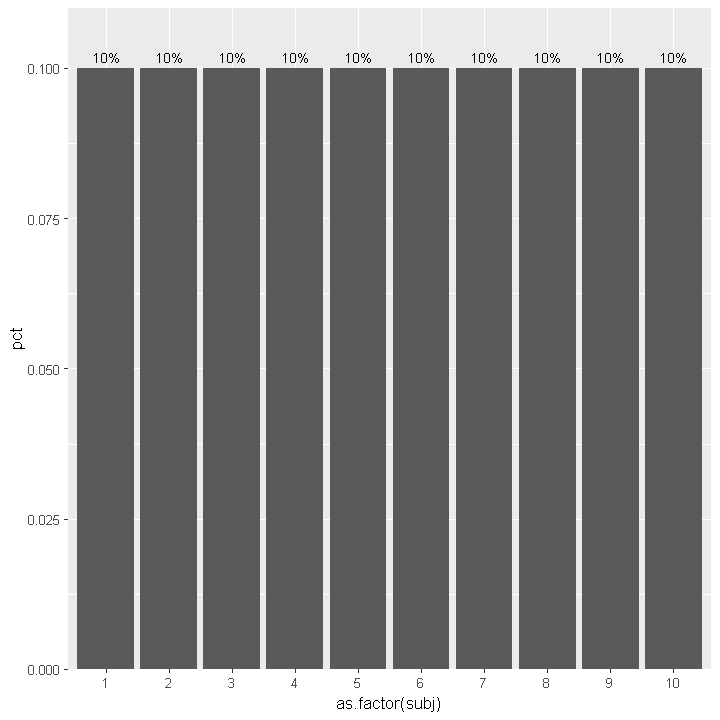

In [38]:
data3 %>% 
     select(period, subj) %>% 
     distinct() %>% 
     count(subj = factor(subj)) %>% 
     mutate(pct = prop.table(n)) %>% 
        ggplot(aes(x = as.factor(subj), y = pct, label = paste0(round(pct*100, 1), "%"))) +
         geom_col() +
         geom_text(position = position_dodge(width = .9), vjust = -0.5, size = 3) +
         scale_y_continuous(expand = expansion(mult = c(0, 0.1))) # adds extra space above to show the numbers

☝️ This does not make much sense but the code can be used e.g. for covariate category exploration.

<a name="toc_788789_3"></a>
## 3.   Process multiple columns with at once

The `across()` function is the most recent alternative to the earlier `mutate_at`, `mutate_all` and `mutate_if` dplyr functions:`
- `mutate_at` affects variables selected with a character vector or `vars()`
- `mutate_all` affects every variable
- `mutate_if` affects variables selected with a predicate function

<a name="toc_788789_3.1"></a>
<u>3.1 The `across()` function</u>

In [49]:
set.seed(5212)
data4 <- expand.grid(Gender = rep(c("M", "F"), 3), Group = c("A", "B", "C")) %>%
  mutate(subj = as.factor(c(1:18)), 
         value1 = rnorm(18, 100, 20),
         value2 = rnorm(18, 10, 2),
         value3 = rnorm(18, 50, 5))

head(data4, 2)

,Gender,Group,subj,value1,value2,value3
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
1,M,A,1,71.71731,12.311578,54.29632
2,F,A,2,81.46142,9.641766,39.78287


In [80]:
data4 %>%
 mutate(across(c(value1, value2, value3),
         ~ as.character(format(round(.x, 0))))) %>%
head(2)     

,Gender,Group,subj,value1,value2,value3
,<fct>,<fct>,<fct>,<chr>,<chr>,<chr>
1,M,A,1,72,12,54
2,F,A,2,81,10,40


Alternatively, we can use column idexes instead of column names:

In [115]:
data4 %>%
 mutate(across(c(4:6),
         ~ as.character(format(round(.x, 0))))) %>%
head(2)     

,Gender,Group,subj,value1,value2,value3
,<fct>,<fct>,<fct>,<chr>,<chr>,<chr>
1,M,A,1,72,12,54
2,F,A,2,81,10,40


Above the `~` tells R that we are using a formula, so it knows that `.` (or alternatively, `.x`) should be replaced with the given column name. This is a *purrr-style format*, but may not be required for more simple cases.

In [104]:
data4 %>%
  group_by(Group, Gender)  %>%
  mutate(across(c(value1, value2), ~ mean(., na.rm = TRUE)))  %>% # alternative: mutate_at(c("value1", "value2"), mean)  %>%
  select(-subj)  %>%
  distinct() %>%
  head(4)

Gender,Group,value1,value2,value3
<fct>,<fct>,<dbl>,<dbl>,<dbl>
M,A,88.83398,11.93799,54.29632
F,A,113.05251,12.42301,39.78287
M,A,88.83398,11.93799,43.43926
F,A,113.05251,12.42301,46.36044


We can even use conditional statements and other complex syntax with `across()`:

In [86]:
data4 %>%
 mutate(across(c(value1, value2, value3),
          ~ ifelse(Gender == "M", "NC", round(.x, 0)))) %>%
head(2)     

,Gender,Group,subj,value1,value2,value3
,<fct>,<fct>,<fct>,<chr>,<chr>,<chr>
1,M,A,1,NC,NC,NC
2,F,A,2,81,10,40


<a name="toc_788789_3.2"></a>
<u>3.2 Dynamic column selection with `matches()` and `where()`</u>

Name based column selection can be done with `matches()`:

In [139]:
iris %>% 
  mutate(across(matches("Sepal"), log)) %>% 
  head(2)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,1.629241,1.252763,1.4,0.2,setosa
2,1.589235,1.098612,1.4,0.2,setosa


Conditional column selection can be done with `across(where(), ...)`:

In [88]:
data4 %>% 
  mutate(across(where(is.numeric), ~ round(.x, 1))) %>% # alternative: mutate_if(is.numeric, ~ round(., 1)) 
  head(2)

,Gender,Group,subj,value1,value2,value3
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
1,M,A,1,71.7,12.3,54.3
2,F,A,2,81.5,9.6,39.8


In [87]:
data4 %>% 
  mutate(across(where(is.numeric), as.character)) %>% # alternative: mutate_if(is.numeric, as.character)
  head(2)

,Gender,Group,subj,value1,value2,value3
,<fct>,<fct>,<fct>,<chr>,<chr>,<chr>
1,M,A,1,71.7173084039532,12.3115775834841,54.2963192404898
2,F,A,2,81.461421719179,9.64176602016179,39.7828727156924


Give exception from the conditions with `c(where(x), -y)`:

In [101]:
data4 %>%
 mutate(across(c(where(is.numeric), -value3), ~ round(.x, 1)))  %>% 
  head(2)

,Gender,Group,subj,value1,value2,value3
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
1,M,A,1,71.7,12.3,54.29632
2,F,A,2,81.5,9.6,39.78287


Example with more complex `where()` statements:

In [119]:
data4 %>%
  mutate(across(where(is.double) & !c(value1, value2), round)) %>%
  head(2)

,Gender,Group,subj,value1,value2,value3
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
1,M,A,1,71.71731,12.311578,54
2,F,A,2,81.46142,9.641766,40


<a name="toc_788789_3.3"></a>
<u>3.3 Use `everything()`, `all_of()` and `any_of()` with `across`</u>

Select all columns with `everything()`:

In [50]:
data4 %>%
  select_if(is.numeric) %>%
  mutate(across(everything(), mean, na.rm = TRUE)) %>%
  head(1)

,value1,value2,value3
,<dbl>,<dbl>,<dbl>
1,95.91271,10.96017,46.99584


In [51]:
data5 <- data4 %>%
  mutate(value1 = ifelse(Group == "A" & Gender == "M", NA, value1),
        value2 = ifelse(Group == "A" & Gender == "F", NA, value2))

head(data5, 2)

,Gender,Group,subj,value1,value2,value3
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
1,M,A,1,NA,12.31158,54.29632
2,F,A,2,81.46142,NA,39.78287


In [212]:
data5 %>%
  mutate(across(everything(), ~ifelse(is.na(.), 0, .))) %>% # alternative: mutate_if(~any(is.na(.x)), ~ ifelse(is.na(.x),0,.x))
  head(2)

,Gender,Group,subj,value1,value2,value3
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,1,1,1,0.00000,12.31158,54.29632
2,2,1,2,81.46142,0.00000,39.78287


Use `all_of()` to select all columns from a list (given an error if a column does not exist):

In [128]:
cols <- c("value2", "value3")

data4 %>%
  mutate(across(all_of(cols), as.character)) %>%
  head(2)

,Gender,Group,subj,value1,value2,value3
,<fct>,<fct>,<fct>,<dbl>,<chr>,<chr>
1,M,A,1,71.71731,12.3115775834841,54.2963192404898
2,F,A,2,81.46142,9.64176602016179,39.7828727156924


Use `any_of()` to select all existing columns from a list (does not give an error if a column does not exist):

In [129]:
cols <- c("value2", "value3", "value4") # Notice, there is no value4 column, so an_of() should be used!

data4 %>%
  mutate(across(any_of(cols), as.character)) %>%
  head(2)

,Gender,Group,subj,value1,value2,value3
,<fct>,<fct>,<fct>,<dbl>,<chr>,<chr>
1,M,A,1,71.71731,12.3115775834841,54.2963192404898
2,F,A,2,81.46142,9.64176602016179,39.7828727156924


<a name="toc_788789_3.4"></a>
<u>3.4 Creating and naming separate columns for the output</u>

Using `.names = "*{.col}"` to name the new columns and keep the old ones.

In [142]:
iris %>% 
  mutate(across(matches("Sepal"), log, .names = "log_{.col}")) %>% 
  head(2)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,log_Sepal.Length,log_Sepal.Width
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
1,5.1,3.5,1.4,0.2,setosa,1.629241,1.252763
2,4.9,3.0,1.4,0.2,setosa,1.589235,1.098612


<a name="toc_788789_3.5"></a>
<u>3.5 Use `across()` with `summarise()` or `reframe()`</u>

In [130]:
iris %>%
  group_by(Species) %>%
  summarise(across(starts_with("Sepal"), list(mean = mean, sd = sd)))

Species,Sepal.Length_mean,Sepal.Length_sd,Sepal.Width_mean,Sepal.Width_sd
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
setosa,5.006,0.3524897,3.428,0.3790644
versicolor,5.936,0.5161711,2.770,0.3137983
virginica,6.588,0.6358796,2.974,0.3224966


In [131]:
iris %>%
  group_by(Species) %>%
  summarise(across(starts_with("Sepal"), mean, .names = "mean_{.col}"))

Species,mean_Sepal.Length,mean_Sepal.Width
<fct>,<dbl>,<dbl>
setosa,5.006,3.428
versicolor,5.936,2.770
virginica,6.588,2.974


<a name="toc_788789_3.6"></a>
<u>3.6 Insert new row with `add_row()`</u>

In [30]:
  iris %>% 
  head(3) %>% 
  add_row(Species = "SETOSA", Petal.Width = 0.3) 

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
NA,NA,NA,0.3,SETOSA


To imput missing rows, we can use the `complete()` function from `tidyr`:

In [33]:
dt <- expand.grid(name = c("A", "B", "C"), time = c("morning", "afternoon", "evening")) %>%
      mutate(value = 1:9) %>%
      filter(!(name == "B" & time == "evening"))

dt 

name,time,value
<fct>,<fct>,<int>
A,morning,1
B,morning,2
C,morning,3
A,afternoon,4
B,afternoon,5
C,afternoon,6
A,evening,7
C,evening,9


☝️ The `name == "B"` and `time == "evening"` case is missing, but we want a row with `NA` instead for that case.

In [34]:
dt %>%
  complete(name, time)

name,time,value
<fct>,<fct>,<int>
A,morning,1
A,afternoon,4
A,evening,7
B,morning,2
B,afternoon,5
B,evening,NA
C,morning,3
C,afternoon,6
C,evening,9


☝️ Now the dataset is complete!

<a name="toc_788789_4"></a>
## 4.   Mutate with conditions

<a name="toc_788789_4.1"></a>
<u>4.1 Mutate with `ifelse()` </u>

In [119]:
data4 %>%
 mutate(newvar = ifelse(Gender == "M", "NC", round(value1, 0))) %>%
 head(2)     

,Gender,Group,subj,value1,value2,value3,newvar
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<chr>
1,M,A,1,71.71731,12.311578,54.29632,NC
2,F,A,2,81.46142,9.641766,39.78287,81


<a name="toc_788789_4.2"></a>
<u>4.2 Mutate with `case_when()` </u>

In [125]:
data4 %>%
  mutate(newvar = 
             case_when(
                 Group == "A" ~ "G1",
                 Group == "B" ~ "G2",
                 TRUE ~ "Other"
          )
  ) %>%
  head(1)  

,Gender,Group,subj,value1,value2,value3,newvar
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<chr>
1,M,A,1,71.71731,12.31158,54.29632,G1


In [224]:
data4 %>%
  mutate(Sex = case_when(
                    str_detect(Gender, "F") ~ "female",
                    str_detect(Gender, "M") ~ "male",
                    TRUE ~ "NA")) %>%
  head(2)  

,Gender,Group,subj,value1,value2,value3,Sex
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<chr>
1,M,A,1,71.71731,12.311578,54.29632,male
2,F,A,2,81.46142,9.641766,39.78287,female


<a name="toc_788789_4.3"></a>
<u>4.3 The `replace()` function</u>

In [11]:
iris %>%
  mutate(Sepal.Length2 = replace(Sepal.Length, Sepal.Length > 5, 5)) %>%
  head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Sepal.Length2
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1,5.1,3.5,1.4,0.2,setosa,5.0
2,4.9,3.0,1.4,0.2,setosa,4.9
3,4.7,3.2,1.3,0.2,setosa,4.7


<a name="toc_788789_4.4"></a>
<u>4.4 The `any()` and `all()` functions</u>

In [195]:
data4 %>%
 sample_n(2) %>%
 select(Group, value1) %>%
 mutate(subj = "1") %>%
 group_by(subj) %>%
 mutate(A_ratio = ifelse(any(Group == "A"), 
                         value1 / value1[Group == "A"], 
                         "NA"))  

Group,value1,subj,A_ratio
<fct>,<dbl>,<chr>,<chr>
C,107.94348,1,NA
B,85.71268,1,NA


In [187]:
 #set.seed(1212) 
 data4 %>%
 sample_n(2) %>%
 select(Group, value1) %>%
 mutate(subj = "1") %>%
 group_by(subj) %>%
 mutate(newvar = ifelse(all(Group == "B"), 
                         "b", 
                         "NA"))  

Group,value1,subj,newvar
<fct>,<dbl>,<chr>,<chr>
B,103.84834,1,NA
C,75.03137,1,NA


<a name="toc_788789_4.5"></a>
<u>4.5 The `exists()` function</u>

In [215]:
data4 %>%
  mutate(ratio = if(exists("value2")) value1 / value2) %>%
  head(2)

,Gender,Group,subj,value1,value2,value3,ratio
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,M,A,1,71.71731,12.311578,54.29632,5.825192
2,F,A,2,81.46142,9.641766,39.78287,8.448807


In [220]:
data4 %>%
  mutate(Sex = if(!exists("Gender")) "M" else Gender) %>%
  head(2)

,Gender,Group,subj,value1,value2,value3,Sex
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<fct>
1,M,A,1,71.71731,12.311578,54.29632,M
2,F,A,2,81.46142,9.641766,39.78287,F


<a name="toc_788789_5"></a>
## 5.   Advanced filtering and column handling

<a name="toc_788789_5.1"></a>
<u>5.1 The `if_any()` and `if_all()` functions</u>

Use `if_any()` and `if_all()`:

In [112]:
# Select columns where any of the columns ending with "Width" contain values > 4
iris %>%
  filter(if_any(ends_with("Width"), ~ . > 4))

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.7,4.4,1.5,0.4,setosa
5.2,4.1,1.5,0.1,setosa
5.5,4.2,1.4,0.2,setosa


In [113]:
# Select columns where all of the columns ending with "Width" contain values > 2.5
iris %>%
  filter(if_all(ends_with("Width"), ~ . > 2.4))

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
6.3,3.3,6.0,2.5,virginica
7.2,3.6,6.1,2.5,virginica
6.7,3.3,5.7,2.5,virginica


<a name="toc_788789_5.2"></a>
<u>5.2 The `select_if()` and `select_at()` functions</u>

In [146]:
iris %>% 
  select_if(is.numeric) %>% 
  head(2)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
,<dbl>,<dbl>,<dbl>,<dbl>
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2


Use the `select_if(function(x) condition1 | condition2)` syntax for more complicated examples

In [148]:
iris %>% 
  select_if(function(x) is.numeric(x) && mean(x) > 3.5) %>% 
  head(2)

,Sepal.Length,Petal.Length
,<dbl>,<dbl>
1,5.1,1.4
2,4.9,1.4


<a name="toc_788789_5.3"></a>
<u>5.3 The `rename_width()` function</u>

In [198]:
iris %>% 
  rename_with(tolower) %>% 
  head(1) 

,sepal.length,sepal.width,petal.length,petal.width,species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa


In [199]:
iris %>% 
  rename_with(str_to_title) %>% 
  head(1) 

,Sepal.length,Sepal.width,Petal.length,Petal.width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa


In [169]:
data4 %>% 
  rename_with(~ paste0(., "_num"), 4:6)  %>% 
  head(1) 

,Gender,Group,subj,value1_num,value2_num,value3_num
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
1,M,A,1,71.71731,12.31158,54.29632


In [161]:
is_whole  <- function(x) all(floor(x) == x)

mtcars %>% 
  rename_with(toupper, where(is_whole)) %>% 
  head(1) 

,mpg,CYL,disp,HP,drat,wt,qsec,VS,AM,GEAR,CARB
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21,6,160,110,3.9,2.62,16.46,0,1,4,4


<a name="toc_788789_6"></a>
## 6.   Handling NA

For an in-depth overview of missing data handling, check the **Cleanind_data_in_R** Notebook!

In [54]:
# Find rows that contain NA
data5 %>%
    filter(if_any(everything(), ~ is.na(.))) 

Gender,Group,subj,value1,value2,value3
<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
M,A,1,NA,12.311578,54.29632
F,A,2,81.46142,NA,39.78287
M,A,3,NA,13.758260,43.43926
F,A,4,112.88687,NA,46.36044
M,A,5,NA,9.744124,48.06578
F,A,6,144.80922,NA,45.95515


In [29]:
# Total Number of NAs in the dataset
sum(is.na(data5))  

[1] 6

In [180]:
data5 %>%
  filter(!is.na(value1)) %>%
  head(3)

,Gender,Group,subj,value1,value2,value3
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
1,F,A,2,81.46142,NA,39.78287
2,F,A,4,112.88687,NA,46.36044
3,F,A,6,144.80922,NA,45.95515


In [179]:
data5 %>%
  filter(if_all(c(value1, value2), ~ !is.na(.))) %>%
  head(3)

,Gender,Group,subj,value1,value2,value3
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
1,M,B,7,105.08062,9.501912,55.11975
2,F,B,8,85.71268,9.407883,41.74556
3,M,B,9,84.10510,10.051057,44.91995


In [37]:
data5 %>%
  drop_na()

Gender,Group,subj,value1,value2,value3
<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
M,B,7,105.08062,9.501912,55.11975
F,B,8,85.71268,9.407883,41.74556
M,B,9,84.10510,10.051057,44.91995
F,B,10,105.14120,8.226162,47.16866
M,B,11,103.84834,10.270653,51.53962
F,B,12,100.94637,8.516129,40.84116
M,C,13,83.10430,12.321793,46.35786
F,C,14,93.01286,10.884117,53.58787
M,C,15,111.88045,13.950246,39.72265


In [26]:
data5 %>%
  mutate(value1 = replace(value1, is.na(value1), 0)) %>%
  head(3)

,Gender,Group,subj,value1,value2,value3
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
1,M,A,1,0.00000,12.31158,54.29632
2,F,A,2,81.46142,NA,39.78287
3,M,A,3,0.00000,13.75826,43.43926


In [181]:
data5 %>%
  mutate(across(everything(), ~ ifelse(is.na(.), 0, .))) %>% 
  head(2)

,Gender,Group,subj,value1,value2,value3
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,1,1,1,0.00000,12.31158,54.29632
2,2,1,2,81.46142,0.00000,39.78287


To fill down NAs with last-observation carried forward (LOCF), use `fill()` from `tidyr`:

In [35]:
dt2 <-tibble(name = c("A", NA, NA, "B", NA, NA, "C", NA, NA),
            value = 1:9)

dt2

name,value
<chr>,<int>
A,1
NA,2
NA,3
B,4
NA,5
NA,6
C,7
NA,8
NA,9


In [36]:
dt2 %>%
  fill(name)

name,value
<chr>,<int>
A,1
A,2
A,3
B,4
B,5
B,6
C,7
C,8
C,9


<a name="toc_788789_7"></a>
## 7.   Creating functions from ggplot

Using `aes_string()`:

Using `{{ }}` *(called curly-curly)* from the `rlang` package. `{{}}` tells R to treat the expression inside as an unevaluated argument that should be evaluated in the context of the calling environment.:

☝️ Note the use of `:=` form the `rlang` package. This operator allows us to create or modify columns with names specified by expressions.

To add dynamic x axis label, use `as_label(ensym(arg))`. The `ensym()` function from `rlang` captures the name of the argument or expression. `as_label()` then converts this captured name into a character string:

<div style="text-align:center;">
  <img src="images/tips_01.png" width = "600" align="center">
</div>

<a name="toc_788789_8"></a>
## 8.   Growing datasets with loops

<a name="toc_788789_9"></a>
## 9.  Check if an object exists

<a name="toc_788789_10"></a>
## 10.   Useful custom mathematical functions

In [192]:
round2 <- function (x, digits = 0) {
    posneg = sign(x)
    z = trunc(abs(x) * 10 ^ (digits + 1)) / 10
    z = floor(z * posneg + 0.5) / 10 ^ digits
    return(z)
}

geomean <- function(x) {
    exp(mean(log(x)))
}

geocv <- function(x) {
    round2(sqrt(exp(sd(log(x)) ^ 2) - 1) * 100, 1)
}

In [196]:
round(2.5)
round2(2.5) 

[1] 2

[1] 3

In [195]:
vec <- c(2.5, 4, 3.2, 125, 185)
mean(vec)
geomean(vec)

[1] 63.94

[1] 14.92266